# Intro to Deep Learning

Use TensorFlow and Keras to build and train neural networks for structured data.

#### How to Install Keras
Since Keras now comes packaged with TensorFlow, we need to install TensorFlow with the command:

```pip install tensorflow```

### Linear Units in Keras 

The easiest way to create a model in Keras is through `keras.Sequential`, which creates a neural network as a stack of *layers*. We can create models using a *dense* layer.

In [1]:
from tensorflow import keras
from tensorflow.keras import layers

# Create a network with 1 linear unit
model = keras.Sequential([
    layers.Dense(units=1, input_shape=[3])
])

F:\Python\CS417_Fall2025\.venv\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [2]:
import pandas as pd

red_wine = pd.read_csv('../Data/winequality-red.csv')
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
RW_shape = red_wine.shape  # (rows, columns)
print(RW_shape)

(1599, 12)


In [4]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(units=1, input_shape=[RW_shape[1] - 1])
])

#Check weights and bias
w, b = model.weights
print(f"Weight = {w}, bias = {b}")

Weight = <Variable path=sequential_1/dense_1/kernel, shape=(11, 1), dtype=float32, value=[[-9.5427036e-05]
 [ 4.8693389e-01]
 [-6.1059320e-01]
 [-1.2234557e-01]
 [ 6.3941854e-01]
 [-3.0206594e-01]
 [ 5.3207952e-01]
 [ 5.6864101e-01]
 [ 3.0399746e-01]
 [ 1.5490180e-01]
 [ 5.0654191e-01]]>, bias = <Variable path=sequential_1/dense_1/bias, shape=(1,), dtype=float32, value=[0.]>


F:\Python\CS417_Fall2025\.venv\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Building Sequential Models

The `Sequential` model we've been using will connect together a list of layers in order from first to last: the first layer gets the input, the last layer produces the output.

In [5]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    # the hidden ReLU layers
    layers.Dense(units=4, activation='relu', input_shape=[2]),
    layers.Dense(units=3, activation='relu'),
    # the linear output layer 
    layers.Dense(units=1),
])

* activation functions:
	- relu
	- elu
	- selu
	- swish

* As with all machine learning tasks, we begin with a set of training data. 
Each example in the training data consists of some features (the inputs) together with an expected target (the output). Training the network means
adjusting its weights in such a way that it can transform the features into
 the target.
* In addition to the training data, we need two more things:
	- A "**loss function**" that measures how good the network's predictions are.
	- An "**optimizer**" that can tell the network how to change its weights.
	
* The loss function measures the disparity between the the target's true
 value and the value the model predicts.
 
* **Regression problems**: The task is to predict some numerical value.
	- e.g. House Price, Product Quality, the fuel efficiency of a car, ...

* A common loss function for regression problems is the **mean absolute error**
 or **MAE**. For each prediction `y_pred`, **MAE** measures the disparity from the true
 target `y_true` by an absolute difference abs`(y_true - y_pred)`.
 
* Besides **MAE**, other loss functions you might see for regression problems are 
	the **mean-squared error (MSE)** or the **Huber loss** (both available in Keras).
	
* The **optimizer** is an algorithm that adjusts the weights to minimize the loss.
  
### The Optimizer - **Stochastic Gradient Descent ( SGD)**

* Virtually all of the optimization algorithms used in deep learning belong
 to a family called stochastic gradient descent. They are iterative algorithms 
 that train a network in steps. One step of training goes like this:

	1 - Sample some training data and run it through the network to make predictions.

	2 - Measure the loss between the predictions and the true values.

	3 - Finally, adjust the weights in a direction that makes the loss smaller.
	
Then just do this over and over until the loss is 
as small as you like (or until it won't decrease any further.)

* Each iteration's sample of training data is called a **minibatch** 
(or often just "**batch**"), while a complete round of the training data is called an **epoch**.
 The number of **epochs** you train for is how many times the network will see each training example.

* **Adam** is an SGD algorithm that has an adaptive learning rate that makes it suitable for 
most problems without any parameter tuning (it is "self tuning", in a sense). 
* **Adam** is a great general-purpose optimizer.

In [6]:

model.compile(
    optimizer="adam",
    loss="mae",
)

In [7]:
import pandas as pd
from IPython.display import display

red_wine = pd.read_csv('../Data/winequality-red.csv')

# Create training and validation splits
df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)
#display(df_train.head(4))
# Scale to [0, 1]
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)

#display(df_train.head(3))

# Split features and target
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']




In [8]:
print(X_train.shape)

(1119, 11)


In [9]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[11]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])

F:\Python\CS417_Fall2025\.venv\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.compile(
    optimizer='adam',
    loss='mae',
)

In [11]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=10,
)

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - loss: 0.2734 - val_loss: 0.1316
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1398 - val_loss: 0.1285
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.1231 - val_loss: 0.1175
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.1159 - val_loss: 0.1124
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.1100 - val_loss: 0.1062
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.1072 - val_loss: 0.1027
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1047 - val_loss: 0.1088
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.1061 - val_loss: 0.1011
Epoch 9/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.1032 - val_loss: 0.1007
Epoch 10/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.1025 - val_loss: 0.1039


<Axes: >

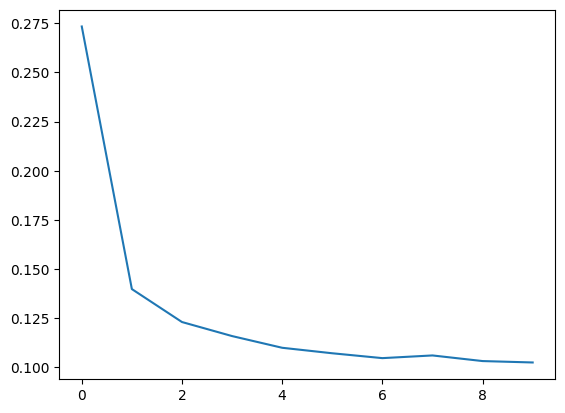

In [12]:
import pandas as pd

# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
history_df['loss'].plot()

### Evaluate Training

**If you trained the model longer, would you expect the loss to decrease further?**

This depends on how the loss has evolved during training: if the learning curves have levelled off, there won't usually be any advantage to training for additional epochs. Conversely, if the loss appears to still be decreasing, then training for longer could be advantageous.

With the learning rate and the batch size, you have some control over:

- How long it takes to train a model
- How noisy the learning curves are
- How small the loss becomes
  
To get a better understanding of these two parameters, we'll look at the linear model, our ppsimplest neural network. Having only a single weight and a bias, it's easier to see what effect a change of parameter has.

### Learning Rate and Batch Size

**What effect did changing these parameters have?**

You probably saw that smaller batch sizes gave noisier weight updates and loss curves. This is because each batch is a small sample of data and smaller samples tend to give noisier estimates. Smaller batches can have an "averaging" effect though which can be beneficial.

Smaller learning rates make the updates smaller and the training takes longer to converge. Large learning rates can speed up training, but don't "settle in" to a minimum as well. When the learning rate is too large, the training can fail completely. (Try setting the learning rate to a large value like 0.99 to see this.)

The `tf.keras.Model` class features built-in training and evaluation methods:

- `tf.keras.Model.fit`: Trains the model for a fixed number of epochs.
- `tf.keras.Model.predict`: Generates output predictions for the input samples.
- `tf.keras.Model.evaluate`: Returns the loss and metrics values for the model; configured via the `tf.keras.Model.compile` method.